In [2]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
#Loading our data set
df = pd.read_csv('worldwide internet prices in 2022 - IN 2022.csv')

Saving worldwide internet prices in 2022 - IN 2022.csv to worldwide internet prices in 2022 - IN 2022.csv


In [3]:
# Exploring our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country code                                      241 non-null    object 
 1   Name                                              242 non-null    object 
 2   Continental region                                242 non-null    object 
 3   NO. OF Internet Plans                             230 non-null    float64
 4   Average price of 1GB (USD)                        242 non-null    object 
 5   Cheapest 1GB for 30 days (USD)                    230 non-null    object 
 6   Most expensive 1GB (USD)                          230 non-null    object 
 7   Average price of 1GB (USD  at the start of 2021)  230 non-null    object 
 8   Average price of 1GB (USD – at start of 2020)     230 non-null    object 
dtypes: float64(1), object(

In [4]:
# Creating a DataFrame that counts each country code and groups the counts by continental region

df_freq_cat = df.groupby('Continental region').agg(
    Freq = ('Country code', 'count')
).sort_values('Freq', ascending=False)

print(df_freq_cat)

                      Freq
Continental region        
SUB-SAHARAN AFRICA      49
CARIBBEAN               31
WESTERN EUROPE          30
ASIA (EX. NEAR EAST)    28
OCEANIA                 25
NEAR EAST               15
EASTERN EUROPE          14
SOUTH AMERICA           14
CIS (FORMER USSR)       11
CENTRAL AMERICA          8
NORTHERN AFRICA          8
NORTHERN AMERICA         4
BALTICS                  3
Europe                   1


In [5]:
# Creating a new column with relative frequency of country counts
df_freq_cat['Rel Freq'] = (df_freq_cat['Freq'] / df_freq_cat['Freq'].sum()) * 100

<ipython-input-6-41370d31cc43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_freq_cat, kind='bar', x='Continental region', y='Freq', palette='tab20', aspect=3, height=4)


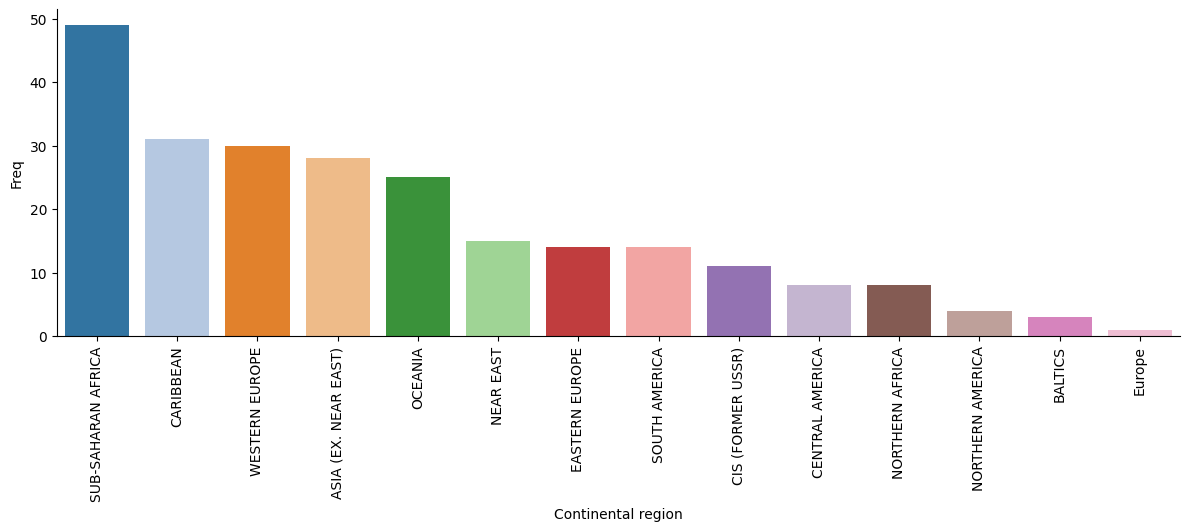

In [6]:
df_freq_cat = df_freq_cat.reset_index()
g = sns.catplot(data=df_freq_cat, kind='bar', x='Continental region', y='Freq', palette='tab20', aspect=3, height=4)
g = plt.xticks(rotation=90)

In [7]:
#Creating a column of bins of equal width
bins = [0, 10, 20, 30, 40, 50, 60]
df['Plan Bins'] = pd.cut(df['NO. OF Internet Plans '], bins)

#Grouping by Bins and counting the the number of entries of Internet Plans per Bin
df_freq_num = df.groupby('Plan Bins').agg(
    Freq = ('NO. OF Internet Plans ', 'count')
)

#Adding a relative frequency column to our frequency table
df_freq_num['Rel Freq'] = (df_freq_num['Freq'] /
                  df_freq_num['Freq'].sum()) * 100

In [12]:
#Creating a column of bins of equal width
bins = [0, 10, 20, 30, 40, 50, 60]
df['Plan Bins'] = pd.cut(df['NO. OF Internet Plans '], bins, labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60'])


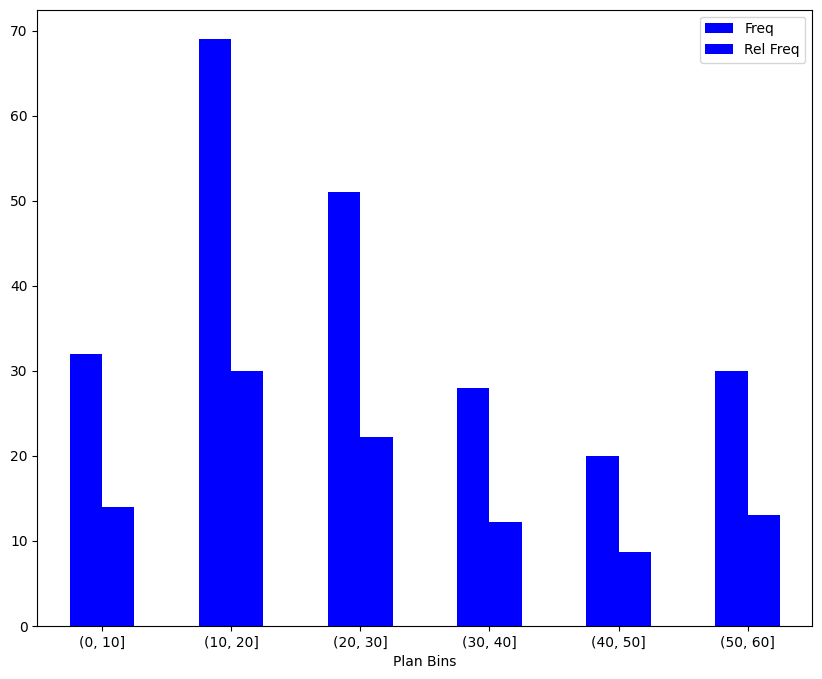

In [9]:
df_freq_num.reset_index()
ax = df_freq_num.plot.bar(rot=0, color="b", figsize=(10,8))
plt.show()

**statistical distributions**

In [13]:
import numpy as np
import random
np.random.seed(12)

#Get a random integer within a specified range
random.randint(0,10)
6

#Get a random element from a sequence
random.choice([1,2,3,4,5,6])
4

#Get a random real number between 0 to 1
random.random()
0.15182916951419145

#Same thing as above using numpy would be
np.random.sample()
0.4631488697273459

0.4631488697273459

**Uniform Distribution**

<Axes: ylabel='Density'>

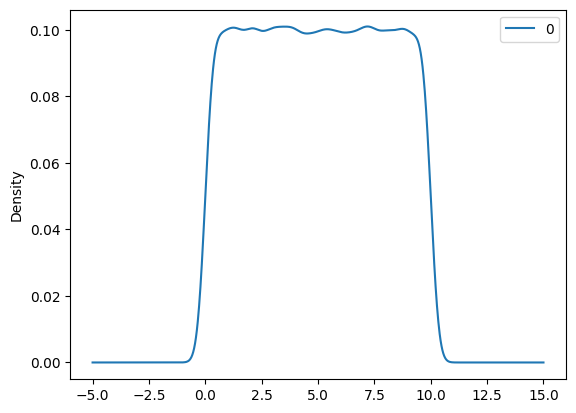

In [14]:
import scipy.stats as stats

uniform_data = stats.uniform.rvs(size=100000,
                 loc=0, #from 0
                 scale=10 #to 10
                 )

pd.DataFrame(uniform_data).plot(kind='density')

In [19]:
stats.uniform.cdf(x=5.0, #cutoff
                 loc=0,
                 scale=10)


0.5

In [20]:
stats.uniform.ppf(q=0.3, #probability cutoff
                 loc=0, #distribution start
                 scale=10) #distribution end

3.0

In [21]:
np.random.uniform()

0.1967468472170517

In [22]:
np.random.uniform(0 #low limit
                  ,10 #upper limit
                  ,(3,4)) #size

array([[8.98793389, 4.45928689, 6.20462917, 6.65114907],
       [8.98087544, 5.91319149, 6.94850059, 2.51790193],
       [4.26286416, 4.48275941, 8.22769552, 9.19842375]])

In [45]:
from scipy.stats import norm
stats.norm.rvs()

2.6545791749395833

In [24]:
print(stats.norm.cdf(x=0.4))

0.6554217416103242


In [25]:
#Find the quantile for the 97.5% cutoff
print(stats.norm.ppf(q=0.975))

1.959963984540054


In [26]:
np.random.normal(1 #mean
                 ,2 #standard deviation
                 ,(3,2)) #size

array([[-1.90505347,  2.23935844],
       [ 2.361094  ,  3.86853729],
       [ 3.71548098, -0.23473839]])

In [27]:
np.random.rand(3,2)

array([[0.88353354, 0.49373073],
       [0.47046112, 0.49911347],
       [0.80867688, 0.06409739]])

In [28]:
np.random.randn(3,2)

array([[-1.28687757,  0.21151733],
       [-0.52831826, -1.30334352],
       [ 1.89595226, -2.1640845 ]])

**Binomial Distribution**

In [29]:
from scipy.stats import binom

coin=stats.binom.rvs(size=10000 # number of trials
          ,n=10 #number of flips in a trial
          ,p=0.5 #probability of success (say getting heads)
         )
print(pd.crosstab(index="counts",columns=coin))

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts  10  77  433  1176  2041  2512  1991  1208  446  99   7


array([[<Axes: title={'center': '0'}>]], dtype=object)

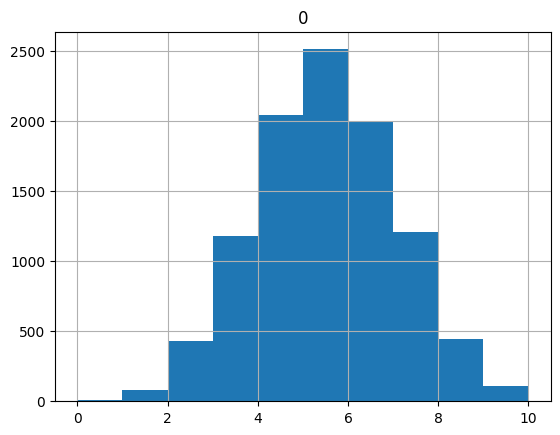

In [30]:
pd.DataFrame(coin).hist()

In [31]:
from scipy.stats import binom

coin=stats.binom.rvs(size=10000 # number of trials
          ,n=10 #number of flips in a trial
          ,p=0.8 #probability of success
         )

print(pd.crosstab(index="counts",columns=coin))

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   3  53  270  887  1995  2998  2745  1049


array([[<Axes: title={'center': '0'}>]], dtype=object)

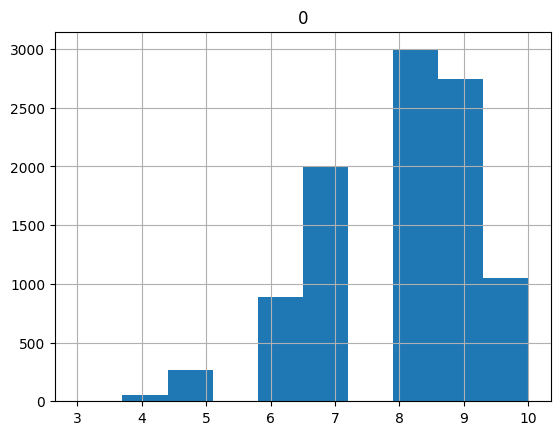

In [32]:
pd.DataFrame(coin).hist()

In [33]:
stats.binom.cdf(k=5, #probability of 5 success or less
               n=10, #with 10 flips
               p=0.8) #success probability 0.8

0.03279349759999997

In [34]:
1-stats.binom.cdf(k=5, #probability of 5 success or less
               n=10, #with 10 flips
               p=0.8) #success probability 0.8

0.9672065024000001

In [35]:
stats.binom.pmf(k=5, #probability of 5 success
               n=10, #with 10 flips
               p=0.5) #success probability 0.5

0.24609375000000003

In [36]:
np.random.binomial(n=52, p=0.7, size=(2,3))

array([[40, 38, 34],
       [34, 37, 35]])

**Geometric Distribution**

In [37]:
heads = stats.geom.rvs(size = 10000, #We generate 10000 trails of flips
                      p=0.5) #fair coin

print(pd.crosstab(index="counts", columns = heads))

col_0     1     2     3    4    5    6   7   8   9   10  11  12  14
row_0                                                              
counts  5006  2509  1235  639  295  159  82  38  18  13   2   3   1


array([[<Axes: title={'center': '0'}>]], dtype=object)

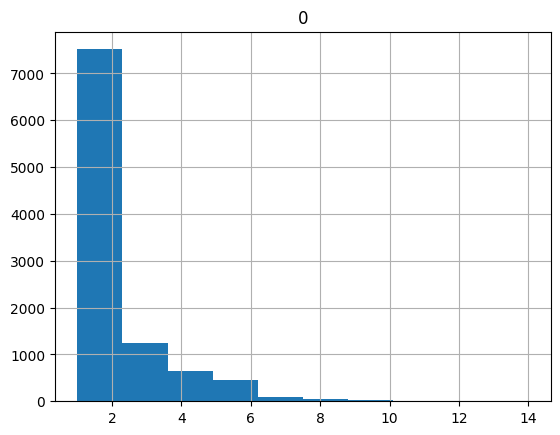

In [38]:
pd.DataFrame(heads).hist()

In [39]:
three_flip = stats.geom.cdf(k=3,
                           p=0.5)
print(three_flip)

0.875


In [40]:
stats.geom.pmf(k=2,
              p=0.5)

0.25

**Exponential Distribution**

In [41]:
prob = stats.expon.cdf(x=1,
                      scale=1) #arrival rate
1-prob

0.36787944117144233

**Poisson Distribution**

In [42]:
arr = stats.poisson.rvs(size=10000,
                       mu=1) #average arrival time 1

print(pd.crosstab(index='counts', columns = arr))


col_0      0     1     2    3    4   5  6
row_0                                    
counts  3690  3649  1836  632  161  27  5


array([[<Axes: title={'center': '0'}>]], dtype=object)

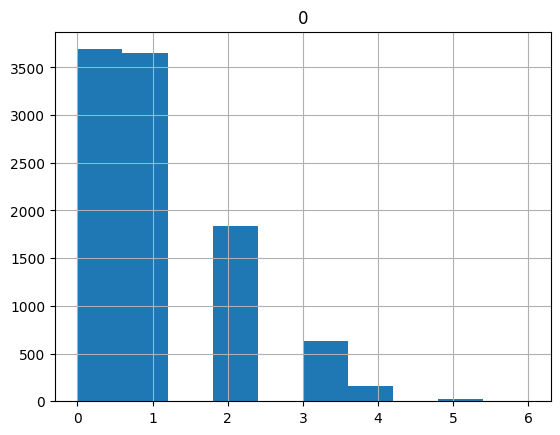

In [43]:
pd.DataFrame(arr).hist()

**Frequency Distribution for Continuous Data (Iris Dataset):**

In [51]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

def calculate_frequency_distribution_continuous(data, variable, num_bins):
    """
    Calculate the frequency distribution of a continuous variable in the dataset.
    """
    # Create bins for the variable
    bins = pd.cut(data[variable], bins=num_bins)

    # Calculate the frequency distribution
    frequency_distribution = bins.value_counts().reset_index()
    frequency_distribution.columns = ['Bin', 'Frequency']
    return frequency_distribution

# Load the Iris dataset
iris_data = pd.read_csv('iris.csv')

# Let's say we want to calculate the frequency distribution of the 'sepal_length' column
frequency_distribution_continuous = calculate_frequency_distribution_continuous(iris_data, 'sepal.length', num_bins=5)

# Display the frequency distribution
print("Frequency distribution of the 'sepal.length' column:")
print(frequency_distribution_continuous)

Saving iris.csv to iris (1).csv
Frequency distribution of the 'sepal.length' column:
             Bin  Frequency
0   (5.74, 6.46]         42
1   (5.02, 5.74]         41
2  (4.296, 5.02]         32
3   (6.46, 7.18]         24
4    (7.18, 7.9]         11


Frequency Distribution for Discrete Data (Survey Dataset):

In [52]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

def calculate_frequency_distribution_discrete(data, variable):
    """
    Calculate the frequency distribution of a discrete variable in the dataset.
    """
    frequency_distribution = data[variable].value_counts().reset_index()
    frequency_distribution.columns = ['Category', 'Frequency']
    return frequency_distribution

# Load the survey dataset
survey_data = pd.read_csv('mall.csv')

# Let's say we want to calculate the frequency distribution of the 'gender' column
frequency_distribution_discrete = calculate_frequency_distribution_discrete(survey_data, 'Genre')

# Display the frequency distribution
print("Frequency distribution of the 'gender' column:")
print(frequency_distribution_discrete)

Saving mall.csv to mall.csv
Frequency distribution of the 'gender' column:
  Category  Frequency
0   Female        112
1     Male         88
